In [2]:
import gym
#import mdptoolbox
import example
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.ticker import FormatStrFormatter
import hiive.mdptoolbox.example
import hiive.mdptoolbox.mdp


In [22]:
def simulate(policy,p):
    state = 0
    reward = 0
    for t in range(1000):
        action = policy[state]
        pcut = np.random.uniform(0, 1)
        if pcut <= p:
            #fire
            state = 0
            continue
        reward += R[state,action]
        #print(state,action,R[state,action])
        if action == 0: #wait
            state += 1
        else: #cut
            state = 0
    return reward

In [37]:
#P, R = hiive.mdptoolbox.example.forest(S=1000, r1=1, r2=1, p=0.01, is_sparse=False)
#R[:,0] = 0
#R[0:10,1] = 0
#R[10:20,1] = list(range(10,20))
#R[20:,1] = 20
#R[:,1]
p = 0.1
P, R = hiive.mdptoolbox.example.forest(S=600,r1=1000,p=p)


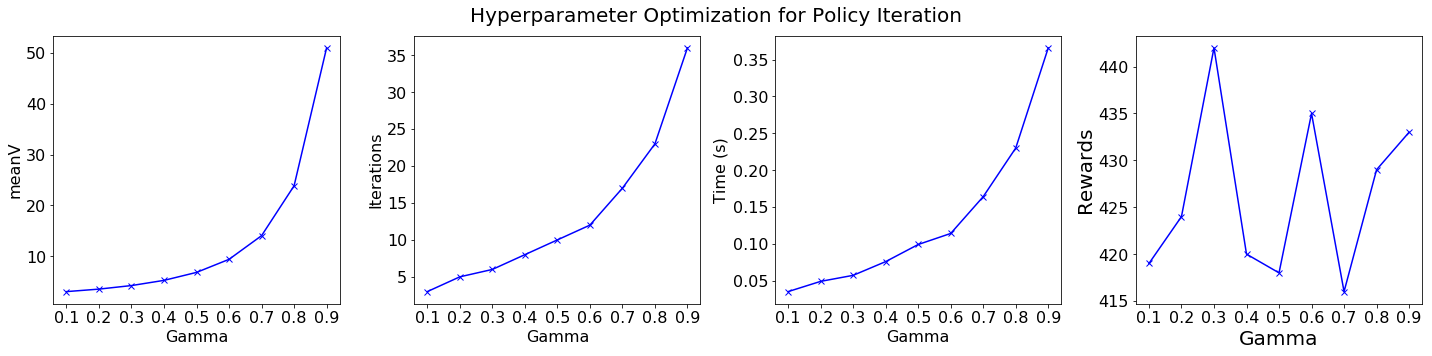

In [51]:
#P, R = hiive.mdptoolbox.example.forest(S=1000, r1=1, r2=1, p=0.01, is_sparse=False)
#P, R = hiive.mdptoolbox.example.forest(S=2000,r1=10000,p=0.0)
meanV = []
#policy = []
iters = []
time = []
rewards = []
l = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for gam in l:
    pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma = gam)
    pi.run()
    meanV.append(np.mean(pi.V))
    iters.append(pi.iter)
    time.append(pi.time)
    policy = pi.policy
    rewards.append(simulate(policy,p))


fig, ax1 = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))
ax1[0].plot(l ,meanV, 'bx-')
ax1[0].set_xlabel('Gamma',fontsize=16)
ax1[0].set_ylabel('meanV',fontsize=16)
ax1[0].set_xticks(l)
ax1[0].set_title('')

ax1[1].plot(l , iters, 'bx-')
ax1[1].set_xlabel('Gamma',fontsize=16)
ax1[1].set_ylabel('Iterations',fontsize=16)
ax1[1].set_xticks(l)
ax1[1].set_title('')

ax1[2].plot(l , time, 'bx-')
ax1[2].set_xlabel('Gamma',fontsize=16)
ax1[2].set_ylabel('Time (s)',fontsize=16)
ax1[2].set_xticks(l)
ax1[2].set_title('')

ax1[3].plot(l , rewards, 'bx-')
ax1[3].set_xlabel('Gamma',fontsize=20)
ax1[3].set_ylabel('Rewards',fontsize=20)
ax1[3].set_xticks(l)
ax1[3].set_title('')

ax1[0].tick_params(axis='both', which='major', labelsize=16)
ax1[1].tick_params(axis='both', which='major', labelsize=16)
ax1[2].tick_params(axis='both', which='major', labelsize=16)
ax1[3].tick_params(axis='both', which='major', labelsize=16)

fig.suptitle('Hyperparameter Optimization for Policy Iteration',fontsize=20)
plt.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.2, wspace = 0.2, hspace = 0.3)    
plt.tight_layout()
plt.show()

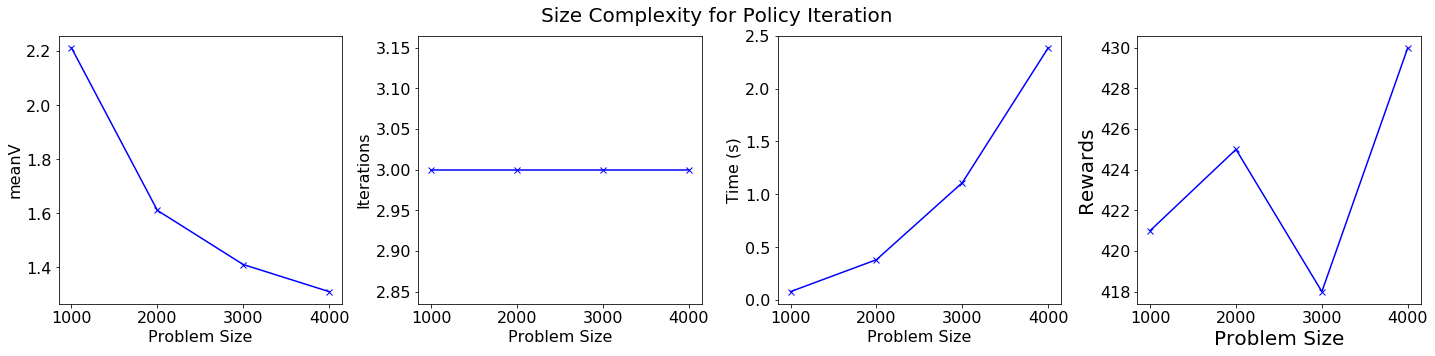

In [58]:


meanV = []
#policy = []
iters = []
time = []
rewards = []
l = [1000,2000,3000,4000]
for s in l:
    P, R = hiive.mdptoolbox.example.forest(S=s,r1=1000,p=p)
    pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma = 0.1)
    pi.run()
    gamma_arr[i]=(i+0.5)/10
    meanV.append(np.mean(pi.V))
    iters.append(pi.iter)
    time.append(pi.time)
    policy = pi.policy
    rewards.append(simulate(policy,p))


fig, ax1 = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))
ax1[0].plot(l ,meanV, 'bx-')
ax1[0].set_xlabel('Problem Size',fontsize=16)
ax1[0].set_ylabel('meanV',fontsize=16)
ax1[0].set_xticks(l)
ax1[0].set_title('')

ax1[1].plot(l , iters, 'bx-')
ax1[1].set_xlabel('Problem Size',fontsize=16)
ax1[1].set_ylabel('Iterations',fontsize=16)
ax1[1].set_xticks(l)
ax1[1].set_title('')

ax1[2].plot(l , time, 'bx-')
ax1[2].set_xlabel('Problem Size',fontsize=16)
ax1[2].set_ylabel('Time (s)',fontsize=16)
ax1[2].set_xticks(l)
ax1[2].set_title('')

ax1[3].plot(l , rewards, 'bx-')
ax1[3].set_xlabel('Problem Size',fontsize=20)
ax1[3].set_ylabel('Rewards',fontsize=20)
ax1[3].set_xticks(l)
ax1[3].set_title('')

ax1[0].tick_params(axis='both', which='major', labelsize=16)
ax1[1].tick_params(axis='both', which='major', labelsize=16)
ax1[2].tick_params(axis='both', which='major', labelsize=16)
ax1[3].tick_params(axis='both', which='major', labelsize=16)

fig.suptitle('Size Complexity for Policy Iteration',fontsize=20)
plt.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.2, wspace = 0.2, hspace = 0.3)    
plt.tight_layout()
plt.show()

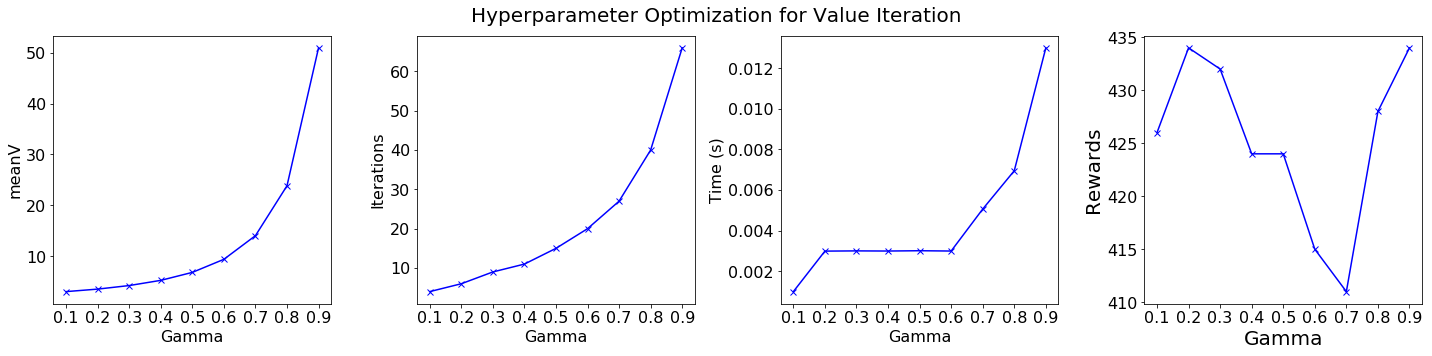

In [65]:
P, R = hiive.mdptoolbox.example.forest(S=600,r1=1000,p=p)
meanV = []
iters = []
time = []
rewards = []
l = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for gam in l:
    pi = hiive.mdptoolbox.mdp.ValueIteration(P, R, gamma = gam)
    pi.run()
    meanV.append(np.mean(pi.V))
    iters.append(pi.iter)
    time.append(pi.time)
    policy = pi.policy
    rewards.append(simulate(policy,p))


fig, ax1 = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))
ax1[0].plot(l ,meanV, 'bx-')
ax1[0].set_xlabel('Gamma',fontsize=16)
ax1[0].set_ylabel('meanV',fontsize=16)
ax1[0].set_xticks(l)
ax1[0].set_title('')

ax1[1].plot(l , iters, 'bx-')
ax1[1].set_xlabel('Gamma',fontsize=16)
ax1[1].set_ylabel('Iterations',fontsize=16)
ax1[1].set_xticks(l)
ax1[1].set_title('')

ax1[2].plot(l , time, 'bx-')
ax1[2].set_xlabel('Gamma',fontsize=16)
ax1[2].set_ylabel('Time (s)',fontsize=16)
ax1[2].set_xticks(l)
ax1[2].set_title('')

ax1[3].plot(l , rewards, 'bx-')
ax1[3].set_xlabel('Gamma',fontsize=20)
ax1[3].set_ylabel('Rewards',fontsize=20)
ax1[3].set_xticks(l)
ax1[3].set_title('')

ax1[0].tick_params(axis='both', which='major', labelsize=16)
ax1[1].tick_params(axis='both', which='major', labelsize=16)
ax1[2].tick_params(axis='both', which='major', labelsize=16)
ax1[3].tick_params(axis='both', which='major', labelsize=16)

fig.suptitle('Hyperparameter Optimization for Value Iteration',fontsize=20)
plt.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.2, wspace = 0.2, hspace = 0.3)    
plt.tight_layout()
plt.show()

In [71]:
pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma = 0.1)
pi.run()
vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, gamma = 0.1)
vi.run()
pi.policy==vi.policy
ql = hiive.mdptoolbox.mdp.QLearning(P,R,gamma=0.5,alpha=0.1,alpha_decay=0.99,epsilon=0.5,epsilon_decay=0.90)
ql.run()
ql.policy==pi.policy
ql.policy

(0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


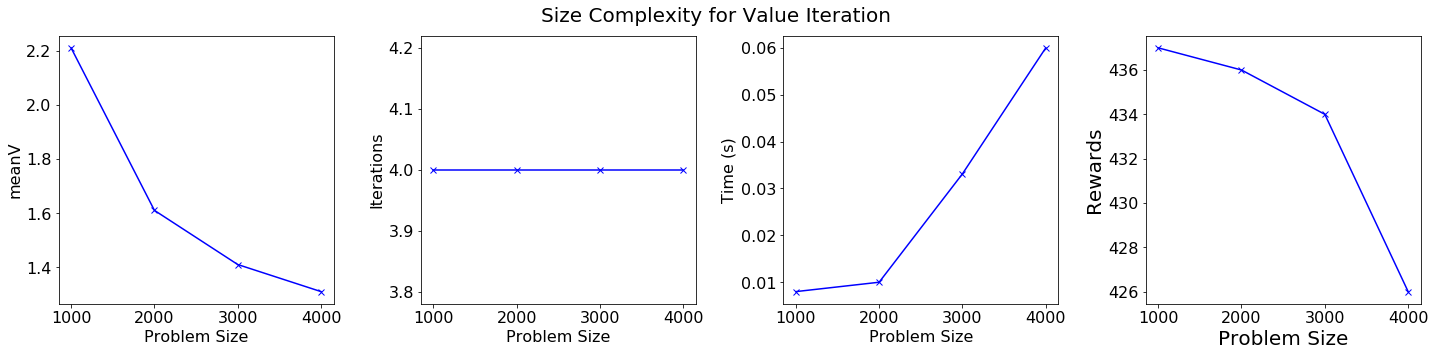

In [67]:
meanV = []
#policy = []
iters = []
time = []
rewards = []
l = [1000,2000,3000,4000]
for s in l:
    P, R = hiive.mdptoolbox.example.forest(S=s,r1=1000,p=p)
    pi = hiive.mdptoolbox.mdp.ValueIteration(P, R, gamma = 0.1)
    pi.run()
    gamma_arr[i]=(i+0.5)/10
    meanV.append(np.mean(pi.V))
    iters.append(pi.iter)
    time.append(pi.time)
    policy = pi.policy
    rewards.append(simulate(policy,p))


fig, ax1 = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))
ax1[0].plot(l ,meanV, 'bx-')
ax1[0].set_xlabel('Problem Size',fontsize=16)
ax1[0].set_ylabel('meanV',fontsize=16)
ax1[0].set_xticks(l)
ax1[0].set_title('')

ax1[1].plot(l , iters, 'bx-')
ax1[1].set_xlabel('Problem Size',fontsize=16)
ax1[1].set_ylabel('Iterations',fontsize=16)
ax1[1].set_xticks(l)
ax1[1].set_title('')

ax1[2].plot(l , time, 'bx-')
ax1[2].set_xlabel('Problem Size',fontsize=16)
ax1[2].set_ylabel('Time (s)',fontsize=16)
ax1[2].set_xticks(l)
ax1[2].set_title('')

ax1[3].plot(l , rewards, 'bx-')
ax1[3].set_xlabel('Problem Size',fontsize=20)
ax1[3].set_ylabel('Rewards',fontsize=20)
ax1[3].set_xticks(l)
ax1[3].set_title('')

ax1[0].tick_params(axis='both', which='major', labelsize=16)
ax1[1].tick_params(axis='both', which='major', labelsize=16)
ax1[2].tick_params(axis='both', which='major', labelsize=16)
ax1[3].tick_params(axis='both', which='major', labelsize=16)

fig.suptitle('Size Complexity for Value Iteration',fontsize=20)
plt.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.2, wspace = 0.2, hspace = 0.3)    
plt.tight_layout()
plt.show()

In [25]:
p = 0.1
P, R = hiive.mdptoolbox.example.forest(S=600,r1=1000,p=p)

gamma = np.linspace(0.5, 0.9, 5)
alpha = np.linspace(0.1, 0.9, 5)
alpha_decay = [0.95, 0.97, 0.99]
epsilon = np.linspace(0.5, 1., 6)
epsilon_decay = [0.95, 0.97, 0.99]
for gam in gamma:
    for alp in alpha:
        for alpd in alpha_decay:
            for eps in epsilon:
                for epsd in epsilon_decay:  
                    np.random.seed(1)
                    pi = hiive.mdptoolbox.mdp.QLearning(P,R,gamma=gam,alpha=alp,alpha_decay=alpd,epsilon=eps,epsilon_decay=epsd)
                    pi.run()
                    policy = pi.policy
                    reward = simulate(policy,p)
                    print("Iter",len(pi.run_stats),"Time",pi.time,"Reward",reward,gam,alp,alpd,eps,epsd) 


#alpha=0.1, alpha_decay=0.99, alpha_min=0.001,
#                 epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
#                 n_iter=10000, skip_check=False, iter_callback=None,
#                 run_stat_frequency=None):



Iter 10000 Time 0.5651717185974121 Reward 266.0 0.5 0.1 0.95 0.5 0.95
Iter 10000 Time 0.5728468894958496 Reward 266.0 0.5 0.1 0.95 0.5 0.97
Iter 10000 Time 0.6190335750579834 Reward 424.0 0.5 0.1 0.95 0.5 0.99
Iter 10000 Time 0.5666670799255371 Reward 424.0 0.5 0.1 0.95 0.6 0.95
Iter 10000 Time 0.5634052753448486 Reward 424.0 0.5 0.1 0.95 0.6 0.97
Iter 10000 Time 0.5504066944122314 Reward 423.0 0.5 0.1 0.95 0.6 0.99
Iter 10000 Time 0.6151857376098633 Reward 424.0 0.5 0.1 0.95 0.7 0.95
Iter 10000 Time 0.5709035396575928 Reward 424.0 0.5 0.1 0.95 0.7 0.97
Iter 10000 Time 0.5698003768920898 Reward 423.0 0.5 0.1 0.95 0.7 0.99
Iter 10000 Time 0.5496735572814941 Reward 424.0 0.5 0.1 0.95 0.8 0.95
Iter 10000 Time 0.544525146484375 Reward 424.0 0.5 0.1 0.95 0.8 0.97
Iter 10000 Time 0.4940042495727539 Reward 423.0 0.5 0.1 0.95 0.8 0.99
Iter 10000 Time 0.5320930480957031 Reward 424.0 0.5 0.1 0.95 0.9 0.95
Iter 10000 Time 0.6184759140014648 Reward 424.0 0.5 0.1 0.95 0.9 0.97
Iter 10000 Time 0.532

Iter 10000 Time 0.5916464328765869 Reward 424.0 0.5 0.30000000000000004 0.99 1.0 0.97
Iter 10000 Time 0.6048605442047119 Reward 424.0 0.5 0.30000000000000004 0.99 1.0 0.99
Iter 10000 Time 0.5829942226409912 Reward 266.0 0.5 0.5 0.95 0.5 0.95
Iter 10000 Time 0.5889406204223633 Reward 266.0 0.5 0.5 0.95 0.5 0.97
Iter 10000 Time 0.5920200347900391 Reward 424.0 0.5 0.5 0.95 0.5 0.99
Iter 10000 Time 0.5831482410430908 Reward 424.0 0.5 0.5 0.95 0.6 0.95
Iter 10000 Time 0.6481854915618896 Reward 424.0 0.5 0.5 0.95 0.6 0.97
Iter 10000 Time 0.5634636878967285 Reward 423.0 0.5 0.5 0.95 0.6 0.99
Iter 10000 Time 0.5340554714202881 Reward 424.0 0.5 0.5 0.95 0.7 0.95
Iter 10000 Time 0.5433084964752197 Reward 424.0 0.5 0.5 0.95 0.7 0.97
Iter 10000 Time 0.5150518417358398 Reward 423.0 0.5 0.5 0.95 0.7 0.99
Iter 10000 Time 0.5630354881286621 Reward 424.0 0.5 0.5 0.95 0.8 0.95
Iter 10000 Time 0.5870969295501709 Reward 424.0 0.5 0.5 0.95 0.8 0.97
Iter 10000 Time 0.5703878402709961 Reward 423.0 0.5 0.5 0.

Iter 10000 Time 0.5509638786315918 Reward 424.0 0.5 0.7000000000000001 0.99 1.0 0.95
Iter 10000 Time 0.5500102043151855 Reward 424.0 0.5 0.7000000000000001 0.99 1.0 0.97
Iter 10000 Time 0.7040250301361084 Reward 424.0 0.5 0.7000000000000001 0.99 1.0 0.99
Iter 10000 Time 0.7089991569519043 Reward 266.0 0.5 0.9 0.95 0.5 0.95
Iter 10000 Time 0.6041712760925293 Reward 266.0 0.5 0.9 0.95 0.5 0.97
Iter 10000 Time 0.5310657024383545 Reward 424.0 0.5 0.9 0.95 0.5 0.99
Iter 10000 Time 0.5816020965576172 Reward 266.0 0.5 0.9 0.95 0.6 0.95
Iter 10000 Time 0.5924241542816162 Reward 424.0 0.5 0.9 0.95 0.6 0.97
Iter 10000 Time 0.8419616222381592 Reward 423.0 0.5 0.9 0.95 0.6 0.99
Iter 10000 Time 0.756340503692627 Reward 424.0 0.5 0.9 0.95 0.7 0.95
Iter 10000 Time 0.637561559677124 Reward 424.0 0.5 0.9 0.95 0.7 0.97
Iter 10000 Time 0.5990941524505615 Reward 423.0 0.5 0.9 0.95 0.7 0.99
Iter 10000 Time 0.582705020904541 Reward 424.0 0.5 0.9 0.95 0.8 0.95
Iter 10000 Time 0.5950071811676025 Reward 424.0 

KeyboardInterrupt: 

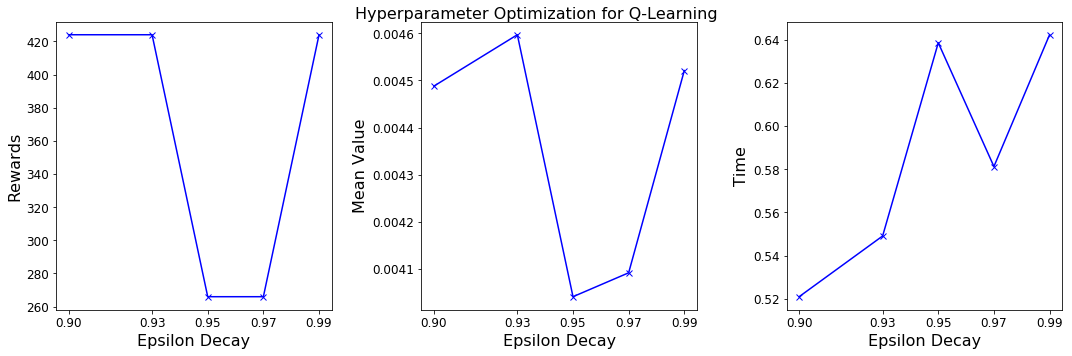

In [36]:
epsilon = np.linspace(0.5, 1., 6)
l = [0.9, 0.93, 0.95, 0.97, 0.99]
rewards = []
meanV = []
time = []
for epsd in l:  
    np.random.seed(1)
    pi = hiive.mdptoolbox.mdp.QLearning(P,R,gamma=0.5,alpha=0.1,alpha_decay=0.99,epsilon=0.5,epsilon_decay=epsd)
    pi.run()
    policy = pi.policy
    rewards.append(simulate(policy,p))
    meanV.append((np.array(pi.V)).mean())
    time.append(pi.time)
    #print("Iter",len(pi.run_stats),"Time",pi.time,"Reward",reward,gam,alp,alpd,eps,epsd) 
    
fig, ax1 = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
ax1[0].plot(l ,rewards, 'bx-')
ax1[0].set_xlabel('Epsilon Decay',fontsize=16)
ax1[0].set_ylabel('Rewards',fontsize=16)
ax1[0].set_xticks(l)
ax1[0].set_title('')

ax1[1].plot(l ,meanV, 'bx-')
ax1[1].set_xlabel('Epsilon Decay',fontsize=16)
ax1[1].set_ylabel('Mean Value',fontsize=16)
ax1[1].set_xticks(l)
ax1[1].set_title('')

ax1[2].plot(l ,time, 'bx-')
ax1[2].set_xlabel('Epsilon Decay',fontsize=16)
ax1[2].set_ylabel('Time',fontsize=16)
ax1[2].set_xticks(l)
ax1[2].set_title('')

ax1[0].tick_params(axis='both', which='major', labelsize=12)
ax1[1].tick_params(axis='both', which='major', labelsize=12)
ax1[2].tick_params(axis='both', which='major', labelsize=12)

fig.suptitle('Hyperparameter Optimization for Q-Learning',fontsize=16)
plt.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.3, wspace = 0.2, hspace = 0.3)    
plt.tight_layout()
plt.show()

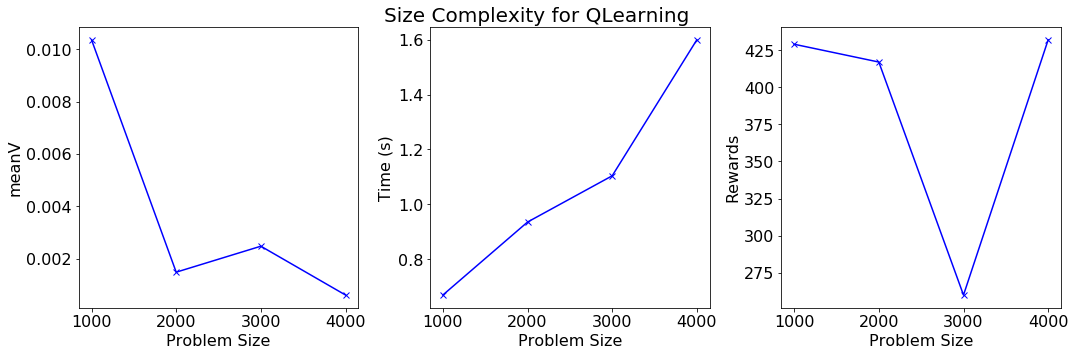

In [74]:
meanV = []
time = []
rewards = []
l = [1000,2000,3000,4000]
for s in l:
    P, R = hiive.mdptoolbox.example.forest(S=s,r1=1000,p=p)
    pi = hiive.mdptoolbox.mdp.QLearning(P,R,gamma=0.5,alpha=0.1,alpha_decay=0.99,epsilon=0.5,epsilon_decay=0.93)
    pi.run()
    gamma_arr[i]=(i+0.5)/10
    meanV.append(np.mean(pi.V))
    time.append(pi.time)
    policy = pi.policy
    rewards.append(simulate(policy,p))


fig, ax1 = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
ax1[0].plot(l ,meanV, 'bx-')
ax1[0].set_xlabel('Problem Size',fontsize=16)
ax1[0].set_ylabel('meanV',fontsize=16)
ax1[0].set_xticks(l)
ax1[0].set_title('')

ax1[1].plot(l , time, 'bx-')
ax1[1].set_xlabel('Problem Size',fontsize=16)
ax1[1].set_ylabel('Time (s)',fontsize=16)
ax1[1].set_xticks(l)
ax1[1].set_title('')

ax1[2].plot(l , rewards, 'bx-')
ax1[2].set_xlabel('Problem Size',fontsize=16)
ax1[2].set_ylabel('Rewards',fontsize=16)
ax1[2].set_xticks(l)
ax1[2].set_title('')

ax1[0].tick_params(axis='both', which='major', labelsize=16)
ax1[1].tick_params(axis='both', which='major', labelsize=16)
ax1[2].tick_params(axis='both', which='major', labelsize=16)

fig.suptitle('Size Complexity for QLearning',fontsize=20)
plt.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.2, wspace = 0.2, hspace = 0.3)    
plt.tight_layout()
plt.show()